# Time Series Analysis

### Used when dataset is ordered by time
### Sample use cases:
- Stock Prices
- Temperatures

In [23]:
import pandas as pd
import numpy as np

### pd.date_range()

In [24]:
pd.date_range(start = '1/1/2018', end = '1/02/2018')

DatetimeIndex(['2018-01-01', '2018-01-02'], dtype='datetime64[ns]', freq='D')

In [25]:
for x in pd.date_range(start = '1/1/2018', end = '1/02/2018'):
    print(x)

2018-01-01 00:00:00
2018-01-02 00:00:00


In [26]:
for x in pd.date_range(start = '1/1/2018', end = '1/02/2018', periods = 4):
    print(x)

2018-01-01 00:00:00
2018-01-01 08:00:00
2018-01-01 16:00:00
2018-01-02 00:00:00


In [27]:
for x in pd.date_range(start = '1/1/2018 00:00:00', end = '1/02/2018 23:59:59', freq = 'H'):
    print(x)

2018-01-01 00:00:00
2018-01-01 01:00:00
2018-01-01 02:00:00
2018-01-01 03:00:00
2018-01-01 04:00:00
2018-01-01 05:00:00
2018-01-01 06:00:00
2018-01-01 07:00:00
2018-01-01 08:00:00
2018-01-01 09:00:00
2018-01-01 10:00:00
2018-01-01 11:00:00
2018-01-01 12:00:00
2018-01-01 13:00:00
2018-01-01 14:00:00
2018-01-01 15:00:00
2018-01-01 16:00:00
2018-01-01 17:00:00
2018-01-01 18:00:00
2018-01-01 19:00:00
2018-01-01 20:00:00
2018-01-01 21:00:00
2018-01-01 22:00:00
2018-01-01 23:00:00
2018-01-02 00:00:00
2018-01-02 01:00:00
2018-01-02 02:00:00
2018-01-02 03:00:00
2018-01-02 04:00:00
2018-01-02 05:00:00
2018-01-02 06:00:00
2018-01-02 07:00:00
2018-01-02 08:00:00
2018-01-02 09:00:00
2018-01-02 10:00:00
2018-01-02 11:00:00
2018-01-02 12:00:00
2018-01-02 13:00:00
2018-01-02 14:00:00
2018-01-02 15:00:00
2018-01-02 16:00:00
2018-01-02 17:00:00
2018-01-02 18:00:00
2018-01-02 19:00:00
2018-01-02 20:00:00
2018-01-02 21:00:00
2018-01-02 22:00:00
2018-01-02 23:00:00


## Seasonality

In [28]:
df = pd.read_csv("occupancy.csv")

In [29]:
df['date'].dtype

dtype('O')

In [30]:
df.index = pd.to_datetime(df['date'])
df.drop(columns = 'date', inplace = True)
df.count()

Temperature      2664
Humidity         2664
Light            2664
CO2              2664
HumidityRatio    2664
Occupancy        2664
dtype: int64

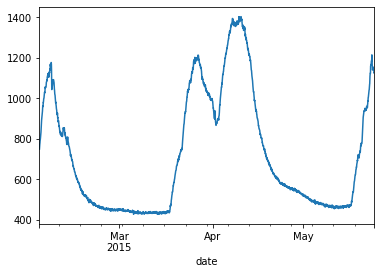

In [11]:
co2 = df['CO2']
co2.plot()

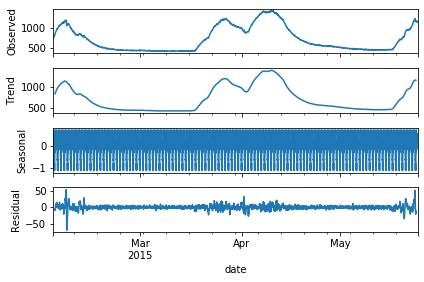

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

_ = seasonal_decompose(co2).plot()

## Stationarity

- A time series is considered stationary if its mean and variance do not vary over time
- Stationarity helps deterine which model to use

We'll use the Augmented Dickey-Fuller test to see whether our dataset is stationary:

In [16]:
from statsmodels.tsa.stattools import adfuller
adfuller(co2)[1] #p-values (hypothesis: data is not stationary) -> since it's lower than 0.05, we reject the null hypothesis.

0.0682262448324105

## Lag plot

- A lag is a time interval
- A lag plot is a special scatter plot where on set of observations in a time series is plotted ("lagged") against a second, later set of data
- Data is autocorrelated if the values that occurred closer together in time are, in fact, closer than the values that occurred farther apart in time
- A positive linear trend suggests positive autocorrelation
- A negative linear trend suggests negative autocorrelation
- The tighter the data is clustered around the diagonal, the more autocorrelation is present

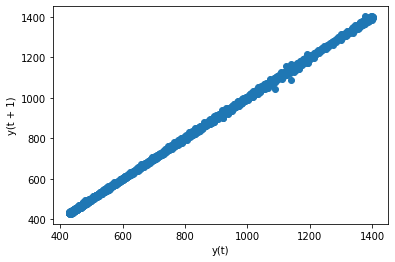

In [17]:
from pandas.plotting import lag_plot
lag_plot(co2)

## Autoregressive moving average (ARMA)

- ARMA is a tool for undertanding and predicting future values in a time series
- the AR part involves regressing the variable on its own lagged (i.e., past) values
- the MA part involves modeling the residuals (prediction errors)
- Usually referred to as the ARMA(p,q) model, where p is the order of the AR part and 1 is the order of the MA part

In [18]:
from statsmodels.tsa.arima_model import ARMA

train = co2[:-3]
test = co2[-3:]

model = ARMA(
    train,
    freq = 'H',
    order = (2, 1)
).fit()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [19]:
model

In [20]:
predictions = model.predict(
    start = len(train),
    end = len(train) + len(test) - 1
)

pd.DataFrame({
    'observed': test,
    'predicted': predictions
})

,observed,predicted
2015-05-24 11:00:00,1125.8,1128.254902
2015-05-24 12:00:00,1123.0,1127.285158
2015-05-24 13:00:00,1124.0,1126.291027


## Root Mean Square Error (RMSE)

- RMSE measure how spread out the residuals (prediction errors) are
- RMSE is the standard deviation (i.e. square root of variance) of the residuals
- Tells you how concentrated the data is around the line of best fit
- Lower values of RMSE indicate better fit
- RMSE is a good measure of how accurately the model predicts the response
- It is the most important criterion for fit if the main purposes of the model is preductions (e.g., forecasting)

In [21]:
from statsmodels.tools.eval_measures import rmse

rmse(test, predictions)

3.143136745752359

In [31]:
from statistics import stdev

stdev(co2)

292.6654255093388